___________________
##### By.
##### A h M e D _ H e f N a w Y
___________________
#### iris_flower classification problem!
___________________

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### load DataSet

In [2]:
# Load dataset
DataSet = pd.read_csv("F:\Careers\Machine Learning\work shop\Projects\iris flowers\DataSet\IRIS.csv")
# DataSet.head(100)

### Summarize the Dataset
##### Now it is time to take a look at the data. with few different ways:_ __ ___ __ __ __ __ __ ___


#####  Dimensions of the dataset.

In [3]:
DataSet.shape

(150, 5)

#####  Peek at the data itself.

In [4]:
DataSet.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#####  Statistical summary of all attributes.

In [5]:
DataSet.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#####  Breakdown of the data by the class variable.
look at the number of instances (rows) that belong to each class. We can view
this as an absolute count.

In [6]:
print(DataSet.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


_____________
### Data Visualization

####  Univariate plots to better understand each attribute.
plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.


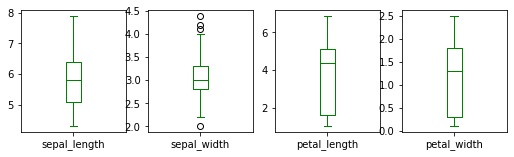

In [7]:
# box and whisker plots
DataSet.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False , figsize=(11,13) , color='g')
plt.show()

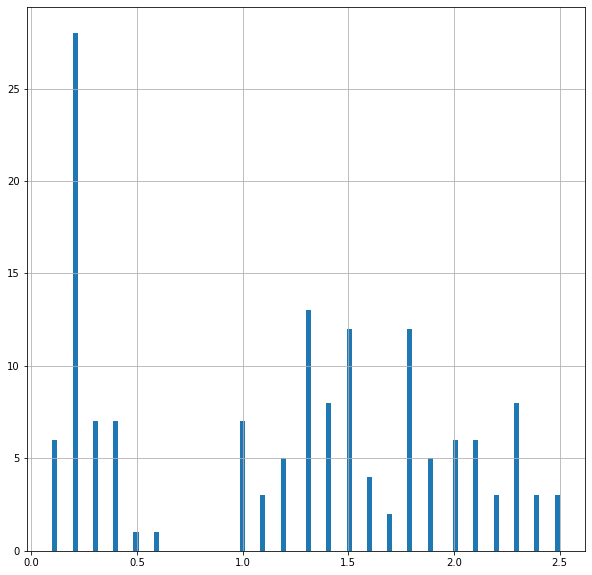

In [8]:
DataSet['petal_width'].hist(bins=100 , figsize=(10,10) )
plt.show()

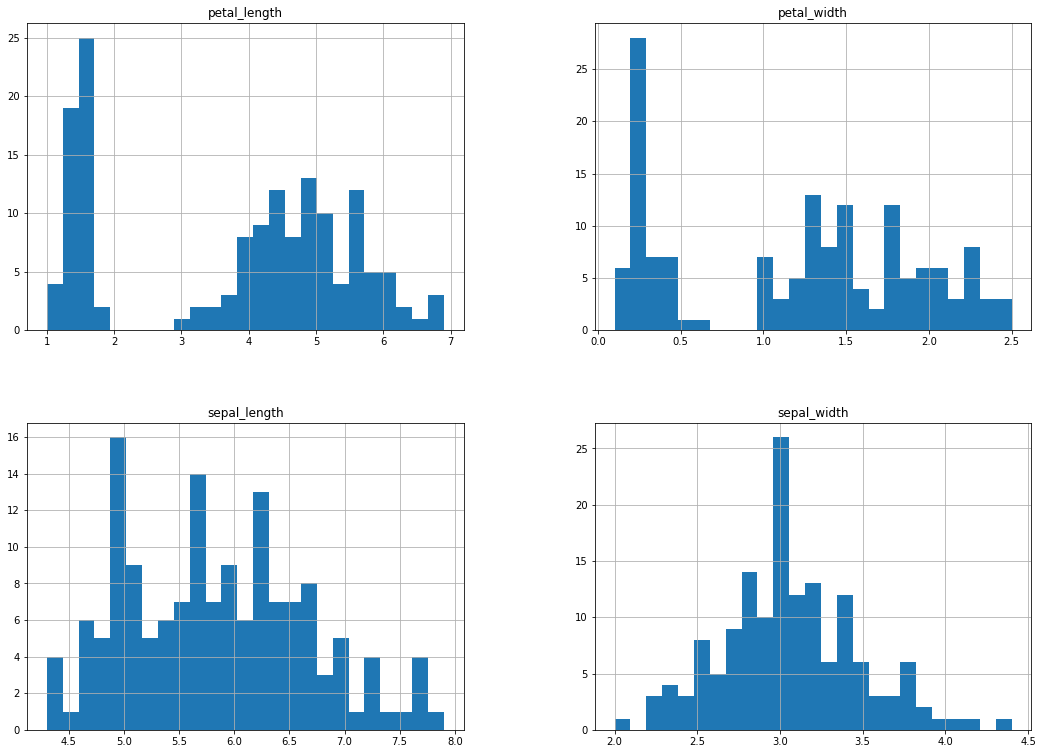

In [9]:
DataSet.hist(bins=25 ,figsize=(18,13))
plt.show()

####  Multivariate plots to better understand the relationships between attributes.
##### look at the interactions between the variables
##### scatter plots of all pairs of attributes.

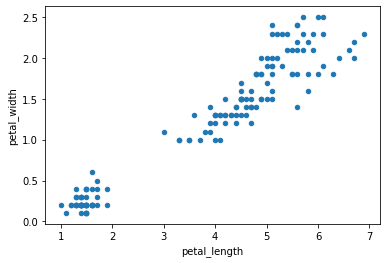

In [10]:
# scatter plot matrix
DataSet.plot(kind='scatter', x = 'petal_length' , y= 'petal_width')
plt.show()

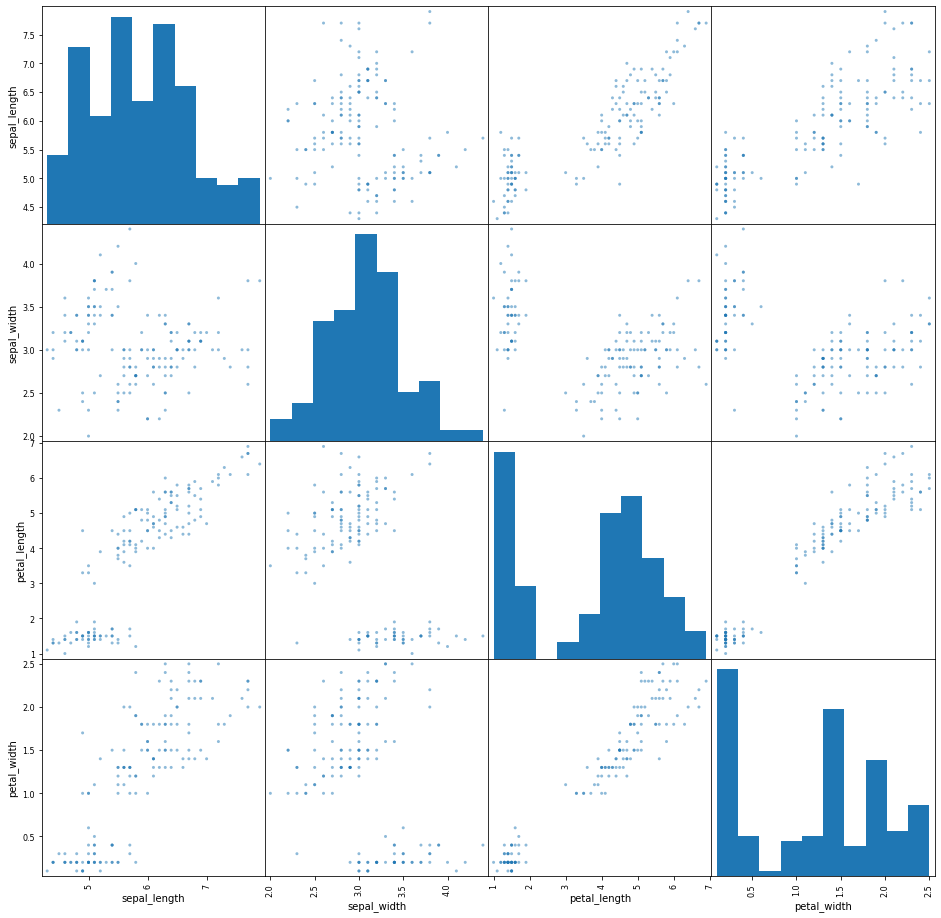

In [11]:
# scatter plot matrix
scatter_matrix(DataSet , figsize=(16,16))
plt.show()

### Evaluate Some Algorithms.
create some models of the data and estimate their accuracy on unseen data.

use statistical methods to estimate the accuracy of the models that we create on unseen data

##### 1. Separate out a validation dataset.
##### 2. Setup the test harness to use 10-fold cross validation.
##### 3. Build 5 different models to predict species from flower measurements
##### 4. Select the best model.

###### 80% > Train DataSet
###### 20% > Test DataSet

In [12]:
# Split-out validation dataset
array = DataSet.values
X = array[:,0:4] # All features
Y = array[:,4] # The Output we need to predict
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### _ _ _ _ _Test Harness
I will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10
parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

#### Build Models
by looking to the plots i note that that some of the classes are partially linearly separable in some
dimensions, so i'am expecting generally good results

this list of algorithms i will try to estiamte theaccuracy and it is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB
and SVM) algorithms.

 Logistic Regression (LR).

 Linear Discriminant Analysis (LDA).

 k-Nearest Neighbors (KNN).

 Classification and Regression Trees (CART).

 Gaussian Naive Bayes (NB).

 Support Vector Machines (SVM).

i will reset the random number seed before each run to ensure that the
evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable ...

In [13]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))# 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("Algorithm Name : {} : reslt_Mean = {} % |---| result_STD = {} \n-------------------------------\n".format( name , cv_results.mean(), cv_results.std() ) )
    

Algorithm Name : LR : reslt_Mean = 0.9666666666666666 % |---| result_STD = 0.04082482904638632 
-------------------------------

Algorithm Name : LDA : reslt_Mean = 0.975 % |---| result_STD = 0.03818813079129868 
-------------------------------

Algorithm Name : KNN : reslt_Mean = 0.9833333333333332 % |---| result_STD = 0.03333333333333335 
-------------------------------

Algorithm Name : CART : reslt_Mean = 0.975 % |---| result_STD = 0.03818813079129868 
-------------------------------

Algorithm Name : NB : reslt_Mean = 0.975 % |---| result_STD = 0.053359368645273735 
-------------------------------

Algorithm Name : SVM : reslt_Mean = 0.9916666666666666 % |---| result_STD = 0.025000000000000012 
-------------------------------



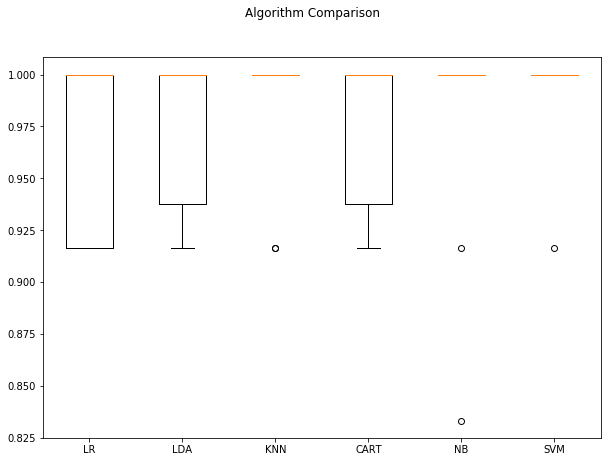

In [14]:
# Compare Algorithms
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


##### The KNN algorithm was the most accurate model that i tested. So i will get an idea of the accuracy of the model on our validation dataset.
##### This will give me an independent final check on the accuracy of the best model.
##### overfitting to the training set or a data leak, So
##### i will run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [15]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('The accuracy Score: ',accuracy_score(Y_validation, predictions)*100,'%', '\n')
print('The confusion matrix: ',confusion_matrix(Y_validation, predictions) , '\n')
print('_____________________\nClassification report: \n',classification_report(Y_validation, predictions))

The accuracy Score:  90.0 % 

The confusion matrix:  [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]] 

_____________________
Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



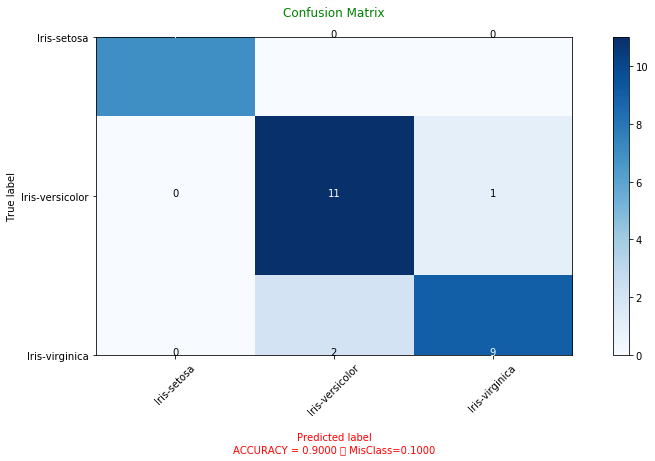

In [48]:
# Method Body
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,color='g')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label\nACCURACY = {:0.4f} \t MisClass={:0.4f}'.format(accuracy, misclass),color='r')
    plt.show()
    
    
# Method Working 
plot_confusion_matrix(cm           =confusion_matrix(Y_validation, predictions), 
                      normalize    = False,
                      target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title        = "Confusion Matrix\n")